In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F


import os
import numpy as np
import math

from Stationary.core import *
from utils.dataset_utils import *
from model.model_creation import *
from model.model_train import *

from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

import torch.nn.functional as F
import copy

from collections import defaultdict

from torch.autograd import Variable





np.random.seed(0)
torch.manual_seed(0)

In [58]:
import os
import numpy as np
import math

import matplotlib.pyplot as plt

from collections import defaultdict

np.random.seed(0)

In [69]:
test_family = 'NonLinearModel_NonLinearTask'
test_name = 'test0'

In [ ]:
import concurrent.futures
import multiprocessing as mp

from generator import *

iterations = 3

if __name__ == '__main__':
  
    SEEDS = np.linspace(1, iterations, iterations, dtype=int).tolist()

    error_list = []
    score_list = []
    error_list_fedavg = []
    score_list_fedavg = []

    with concurrent.futures.ProcessPoolExecutor(max_workers=mp.cpu_count(), mp_context=mp.get_context("spawn")) as executor:
            for error, score, error_fedavg, score_fedavg in executor.map(single_iteration, SEEDS):
                error_list.append(error)
                score_list.append(score)
                error_list_fedavg.append(error_fedavg)
                score_list_fedavg.append(score_fedavg)

In [117]:
err = []
err_std = []
for i in range(0, len(error_list[0])):
    s = 0
    e = []
    for k in error_list:
        s += k[i]
        e.append(k[i])
    err.append(s / len(error_list))
    err_std.append(np.std(e))

sc = []
sc_std = []
for i in range(0, len(score_list[0])):
    s = 0
    e = []
    for k in score_list:
        s += k[i]
        e.append(k[i])
    sc.append(s / len(score_list))
    sc_std.append(np.std(e))

err_s = []
err_s_std = []
for i in range(0, len(error_list_fedavg[0])):
    s = 0
    e = []
    for k in error_list_fedavg:
        s += k[i]
        e.append(k[i])
    err_s.append(s / len(error_list_fedavg))
    err_s_std.append(np.std(e))

sc_s = []
sc_s_std = []
for i in range(0, len(score_list_fedavg[0])):
    s = 0
    e = []
    for k in score_list_fedavg:
        s += k[i]
        e.append(k[i])
    sc_s.append(s / len(score_list_fedavg))
    sc_s_std.append(np.std(e))

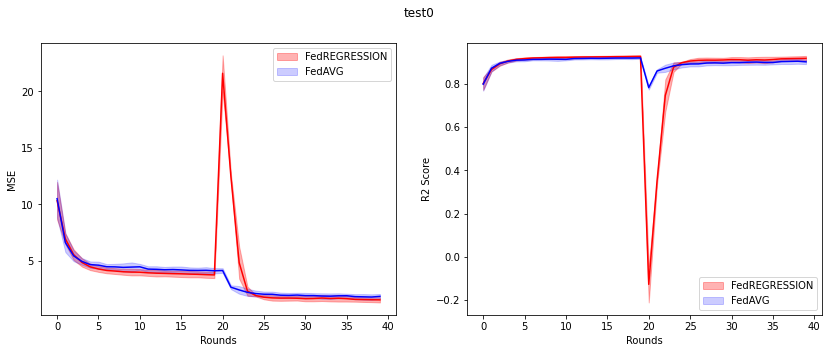

In [118]:
from matplotlib.pyplot import figure
from matplotlib.ticker import MaxNLocator

#plt.figure(figsize=(20,5))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
fig.suptitle(test_name)


x = np.arange(len(error_list[0]))

ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))


ax1.fill_between(x, np.array(err)+np.array(err_std), np.array(err)-np.array(err_std), color='red', label='FedREGRESSION', alpha=0.3)
ax1.fill_between(x, np.array(err_s)+np.array(err_s_std), np.array(err_s)-np.array(err_s_std), color='blue', label='FedAVG', alpha=0.2)
ax1.plot(x, err, color='red')
ax1.plot(x, err_s, color='blue')

ax1.legend(loc='upper right')

ax1.set_xlabel("Rounds")
ax1.set_ylabel("MSE")


#ax1.set_ylim(ymin=0, ymax=3)


ax2.fill_between(x, np.array(sc)+np.array(sc_std), np.array(sc)-np.array(sc_std), color='red', label='FedREGRESSION', alpha=0.3)
ax2.fill_between(x, np.array(sc_s)+np.array(sc_s_std), np.array(sc_s)-np.array(sc_s_std), color='blue', label='FedAVG', alpha=0.2)
ax2.plot(x, sc, color='red')
ax2.plot(x, sc_s, color='blue')
ax2.legend(loc='lower right')

ax2.set_xlabel("Rounds")
ax2.set_ylabel("R2 Score")
#ax2.set_ylim(ymin=0.8, ymax=1)




plt.draw()

plt.savefig("Results/Non_Stationary/"+test_family+"/plots/"+test_name+".svg")

In [119]:
import pandas as pd


d = {'Error_FedREG': err, 
     'Error_FedREG_std': err_std,
     'Score_FedREG': sc, 
     'Score_FedREG_std': sc_std,
     'Error_FedAVG': err_s, 
     'Error_FedAVG_std': err_s_std,
     'Score_FedAVG': sc_s, 
     'Score_FedAVG_std': sc_s_std}

df = pd.DataFrame(data=d)

df.to_csv("Results/Non_Stationary/"+test_family+"/data/"+test_name+".csv", index=False)

In [120]:
pd.read_csv("Results/Non_Stationary/"+test_family+"/data/"+test_name+".csv")

,Error_FedREG,Error_FedREG_std,Score_FedREG,Score_FedREG_std,Error_FedAVG,Error_FedAVG_std,Score_FedAVG,Score_FedAVG_std
0,10.328374,1.657668,0.802736,0.029682,10.512943,1.683000,0.799236,0.030020
1,6.960005,0.462983,0.866867,0.008520,6.630278,0.848111,0.873209,0.015680
2,5.560215,0.468471,0.893612,0.009077,5.452451,0.470950,0.895711,0.008688
3,4.870553,0.369290,0.906824,0.006973,4.961830,0.294873,0.905066,0.005755
4,4.478382,0.288759,0.914326,0.005461,4.678802,0.280253,0.910484,0.005424
5,4.290396,0.257911,0.917919,0.004930,4.629033,0.311436,0.911434,0.006043
6,4.160565,0.249827,0.920420,0.004484,4.488443,0.233059,0.914142,0.004242
7,4.105996,0.258071,0.921475,0.004484,4.477452,0.269824,0.914358,0.004863
8,4.044162,0.264002,0.922656,0.004627,4.434265,0.354131,0.915191,0.006439
9,4.017945,0.293769,0.923163,0.005169,4.459856,0.412563,0.914712,0.007470


In [102]:
import torch
import torch.nn as nn
import torch.nn.functional as F


import os
import numpy as np
import math

from Stationary.core import *
from utils.dataset_utils import *
from model.model_creation import *
from model.model_train import *

from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

import torch.nn.functional as F
import copy

from collections import defaultdict

from torch.autograd import Variable



#-----Linear Regression Parameters

## No Drift:
m = -2.1
m2 = 1.4
m3 = -0.5
c = 1.4
a = 0.1
v = abs(m / 10)

drifts = 2
## After Drift
mm = -6
mm2 = 2.2
mm3 = 0.2
cc = -0.4
aa = 0.1
vv = abs(mm / 10)

    
range_min = 0    #min value of X
range_max = 20    #max value of X
train_percentage = 0.8




'''
Splitting the dataset considering the numer of workers and rounds
'''
def splitDataset(dataset_X, num_workers, num_rounds):
    
    # total number of sets to generate
    a = num_workers * num_rounds
    
    b = math.floor(len(dataset_X)/a)
    x = len(dataset_X) / b
    
        
    return np.array_split(dataset_X, x)


def synthetic_dataset_creator(dataset_size, num_workers, num_rounds, multi_features=False, model_drift=False):

    train_list_X = [] 
    train_list_y = []
    test_X = []
    test_y = []
    
    if model_drift :
        
        after_drift=False
        
        for i in range(drifts):
            
            tr_X, tr_y, t_X, t_y = generate_data(int(dataset_size/drifts), num_workers, int(num_rounds/drifts), after_drift, multi_features)
            
            for j in range(len(tr_X)):
                train_list_X.append(tr_X[j])
                train_list_y.append(tr_y[j])
            
            test_X.append(t_X)
            test_y.append(t_y)
            
            after_drift=True
        
    else:
        train_list_X, train_list_y, test_X, test_y = generate_data(dataset_size, num_workers, num_rounds, multi_features)
    
    return train_list_X, train_list_y, test_X, test_y


def generate_data(dataset_size, num_workers, num_rounds, after_drift=False, multi_features=False):
    
    if multi_features is True:
        
        dataset_X1 = np.random.uniform(low=range_min, high=range_max, size=(dataset_size,))
        dataset_X2 = np.random.uniform(low=range_min, high=range_max, size=(dataset_size,))
        dataset_X3= np.random.uniform(low=range_min, high=range_max, size=(dataset_size,))

        np.random.shuffle(dataset_X1)
        np.random.shuffle(dataset_X2)
        np.random.shuffle(dataset_X3)
        
        dataset_X = np.array([dataset_X1, dataset_X2, dataset_X3])
        
        
        if after_drift:
            #dataset_y = dataset_X1 * mm + dataset_X2 * mm2 + dataset_X3 * mm3 + cc + np.random.randn(dataset_X1.size) * math.sqrt(v)
            dataset_y = mm * np.sin(dataset_X1*(aa*math.pi)+ dataset_X2*(aa*math.pi) + dataset_X3*(aa*math.pi)) + np.random.randn(dataset_X1.size) * math.sqrt(v)
        else:
            #dataset_y = dataset_X1 * m + dataset_X2 * m2 + dataset_X3 * m3 + c + np.random.randn(dataset_X1.size) * math.sqrt(v)
            dataset_y = m * np.sin(dataset_X1*(a*math.pi)+ dataset_X2*(a*math.pi) + dataset_X3*(a*math.pi)) + np.random.randn(dataset_X1.size) * math.sqrt(v)
            
        dataset_y = dataset_y.reshape(-1,1)
        dataset_X = dataset_X.transpose()
        
    else:
        
        dataset_X = np.random.uniform(low=range_min, high=range_max, size=(dataset_size,))
        np.random.shuffle(dataset_X)
        
        if after_drift:
            #dataset_y =  dataset_X * mm + cc +  np.random.randn(dataset_X.size) * math.sqrt(v)
            dataset_y = mm * np.sin(dataset_X*(aa*math.pi)) + np.random.randn(dataset_X.size) * math.sqrt(vv)
        else:
            #dataset_y =  dataset_X * m + c +  np.random.randn(dataset_X.size) * math.sqrt(v)
            dataset_y = m * np.sin(dataset_X*(a*math.pi)) + np.random.randn(dataset_X.size) * math.sqrt(v)

        dataset_X = dataset_X.reshape(-1,1)
        dataset_y = dataset_y.reshape(-1,1)
    
    
    train_X, test_X = np.split(dataset_X, 
                [int(train_percentage * len(dataset_X))
                ])

    train_y, test_y = np.split(dataset_y, 
                [int(train_percentage * len(dataset_y))
                ])
    
    
    train_list_X = splitDataset(train_X, num_workers, num_rounds)
    train_list_y = splitDataset(train_y, num_workers, num_rounds)
    

    for i in range(0, len(train_list_X)):
        train_list_X[i] = torch.from_numpy(train_list_X[i])

    for i in range(0, len(train_list_y)):
        train_list_y[i] = torch.from_numpy(train_list_y[i])
    
    
    return train_list_X, train_list_y, test_X, test_y

In [103]:
train_list_X, train_list_y, test_X, test_y = synthetic_dataset_creator(dataset_size=1000 ,
                                                                       num_workers=4,
                                                                       num_rounds=5,
                                                                       multi_features=False, 
                                                                       model_drift=True)